# Bay Wheels Ride Data in 2018 Exploration and Visualization

### by Soya AOKI

## Preliminary Wrangling

> Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. (Wikipedia)

> The dataset used for this exploratory analysis consists of monthly individual trip data from January 2018 to December 2018 in CSV format covering the greater San Francisco Bay area, also available here.(https://www.lyft.com/bikes/bay-wheels/system-data)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sb

import requests
import zipfile
import os

# Gather

In [2]:
df = pd.DataFrame()

for i in range(12):
    s = '0' + str(i+1)
    s = s[-2:]
    
    filename = '2018' + s +'-fordgobike-tripdata.csv'
    
    print(filename)
    
    if (os.path.exists(filename) == False):
        # HTTP request
        url = 'https://s3.amazonaws.com/baywheels-data/' + filename + '.zip'
        r = requests.get(url)
        with open(url.split('/')[-1], mode = 'wb') as outfile:
                outfile.write(r.content)

        # unzip zipfile
        with zipfile.ZipFile(url.split('/')[-1],'r') as inputFile:
            inputFile.extractall()
    else:
        print("the file already exists.")
    
    # concat DataFrame
    df = pd.concat([df, pd.read_csv(filename)])

# reset index
df.reset_index(inplace=True, drop=True)

201801-fordgobike-tripdata.csv
the file already exists.
201802-fordgobike-tripdata.csv
the file already exists.
201803-fordgobike-tripdata.csv
the file already exists.
201804-fordgobike-tripdata.csv
the file already exists.
201805-fordgobike-tripdata.csv
the file already exists.
201806-fordgobike-tripdata.csv
the file already exists.
201807-fordgobike-tripdata.csv
the file already exists.
201808-fordgobike-tripdata.csv
the file already exists.
201809-fordgobike-tripdata.csv
the file already exists.
201810-fordgobike-tripdata.csv
the file already exists.
201811-fordgobike-tripdata.csv
the file already exists.
201812-fordgobike-tripdata.csv
the file already exists.


In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


# Assess

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
dtypes: float64(6), int64(2), object(6)
memory usage: 199.1+ MB


In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03


In [6]:
df.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           11771
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_id             11771
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

In [7]:
df[df['start_station_id'].isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
623364,5572,2018-06-30 20:58:31.8550,2018-06-30 22:31:24.5930,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4202,Customer,No
623376,573,2018-06-30 22:12:27.5110,2018-06-30 22:22:01.1740,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4095,Subscriber,Yes
623393,850,2018-06-30 22:01:25.5850,2018-06-30 22:15:36.1510,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.95,4122,Customer,No
623429,562,2018-06-30 21:52:05.1180,2018-06-30 22:01:27.4400,NaN,NaN,37.41,-121.94,NaN,NaN,37.42,-121.94,4184,Subscriber,No
623456,819,2018-06-30 21:37:34.5060,2018-06-30 21:51:13.7290,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.96,4137,Customer,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860854,663,2018-12-02 09:47:44.1160,2018-12-02 09:58:47.1620,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4284,Customer,No
1861409,1141,2018-12-01 21:22:41.6460,2018-12-01 21:41:42.7270,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4256,Subscriber,No
1861570,753,2018-12-01 19:57:14.2010,2018-12-01 20:09:47.8580,NaN,NaN,37.41,-121.94,NaN,NaN,37.40,-121.93,4181,Subscriber,No
1862625,2244,2018-12-01 14:01:06.2520,2018-12-01 14:38:30.8950,NaN,NaN,37.41,-121.93,NaN,NaN,37.42,-121.96,4238,Customer,No


In [8]:
df[df['start_station_latitude'] == 37.40]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
623364,5572,2018-06-30 20:58:31.8550,2018-06-30 22:31:24.5930,NaN,NaN,37.4,-121.94,NaN,NaN,37.40,-121.94,4202,Customer,No
623376,573,2018-06-30 22:12:27.5110,2018-06-30 22:22:01.1740,NaN,NaN,37.4,-121.94,NaN,NaN,37.40,-121.93,4095,Subscriber,Yes
623548,7242,2018-06-30 19:19:19.5600,2018-06-30 21:20:02.1110,NaN,NaN,37.4,-121.94,NaN,NaN,37.40,-121.94,4082,Customer,No
623550,694,2018-06-30 21:05:49.6180,2018-06-30 21:17:24.2670,NaN,NaN,37.4,-121.93,NaN,NaN,37.41,-121.94,4136,Customer,No
623551,1608,2018-06-30 20:50:23.7450,2018-06-30 21:17:12.6390,NaN,NaN,37.4,-121.92,NaN,NaN,37.41,-121.94,4184,Customer,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857054,238,2018-12-03 09:03:24.8710,2018-12-03 09:07:23.6730,NaN,NaN,37.4,-121.93,NaN,NaN,37.41,-121.93,4157,Subscriber,No
1859700,457,2018-12-02 15:08:45.3860,2018-12-02 15:16:22.7380,NaN,NaN,37.4,-121.93,NaN,NaN,37.40,-121.93,4181,Subscriber,No
1859803,820,2018-12-02 14:35:10.8620,2018-12-02 14:48:51.7220,NaN,NaN,37.4,-121.92,NaN,NaN,37.39,-121.93,4284,Customer,No
1860277,1787,2018-12-02 12:17:45.9980,2018-12-02 12:47:33.2470,NaN,NaN,37.4,-121.93,NaN,NaN,37.40,-121.93,4181,Customer,No


In [9]:
df.duplicated().sum()

0

In [10]:
df.sort_values('duration_sec', ascending=False)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
187716,86366,2018-02-03 17:32:04.0420,2018-02-04 17:31:30.7880,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,1486,Customer,No
1305040,86281,2018-09-15 13:10:50.7490,2018-09-16 13:08:52.6680,147.0,29th St at Tiffany Ave,37.744067,-122.421472,134.0,Valencia St at 24th St,37.752428,-122.420628,2175,Subscriber,No
467153,86208,2018-05-27 13:23:34.3950,2018-05-28 13:20:23.3170,147.0,29th St at Tiffany Ave,37.744067,-122.421472,74.0,Laguna St at Hayes St,37.776435,-122.426244,1673,Customer,No
1399251,86205,2018-10-30 17:24:11.1100,2018-10-31 17:20:56.7980,276.0,Julian St at The Alameda,37.332233,-121.912517,277.0,Morrison Ave at Julian St,37.333658,-121.908586,1570,Subscriber,Yes
312904,86142,2018-04-30 16:07:13.9190,2018-05-01 16:02:56.7170,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,3191,Subscriber,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365966,61,2018-04-19 22:32:25.5800,2018-04-19 22:33:27.4640,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,3732,Subscriber,No
1368880,61,2018-09-06 12:41:06.2930,2018-09-06 12:42:08.0080,104.0,4th St at 16th St,37.767045,-122.390833,104.0,4th St at 16th St,37.767045,-122.390833,3833,Subscriber,No
1650103,61,2018-11-15 10:41:18.9640,2018-11-15 10:42:20.6900,282.0,Market St at Park St,37.332426,-121.890349,318.0,San Carlos St at Market St,37.330698,-121.888979,1608,Subscriber,No
1680654,61,2018-11-08 23:41:39.2750,2018-11-08 23:42:40.7870,171.0,Rockridge BART Station,37.844279,-122.251900,172.0,College Ave at Taft Ave,37.841800,-122.251535,2598,Subscriber,No


In [11]:
df['duration_sec'].describe(percentiles=[.90, .95, .99])

count    1.863721e+06
mean     8.573026e+02
std      2.370379e+03
min      6.100000e+01
50%      5.560000e+02
90%      1.338000e+03
95%      1.817000e+03
99%      5.533000e+03
max      8.636600e+04
Name: duration_sec, dtype: float64

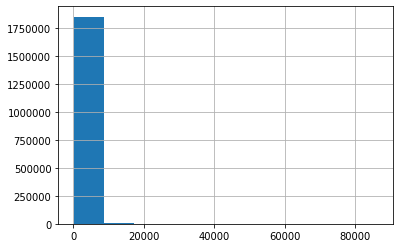

In [12]:
df['duration_sec'].hist()

### Quality

・`start_time` and `end_time` should be type of `datetime`.

・`duration` is too long.

・`duration_sec` is a little bit difficult to understand.

・`id` and `type` should be type of `str`.

### Tidiness

・ It seems there is no problem.


# Clean

In [13]:
df_clean = df.copy()

### _define_

Concert `start_time` and `end_time` to `datetime` using `to_datetime()`.

### _code_

In [14]:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'] )
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'] )

### _test_

In [15]:
type(df_clean['start_time'][0])

pandas._libs.tslibs.timestamps.Timestamp

### _define_

Cut over 99 percentail of `duration_sec`.

### _code_

In [16]:
df_clean = df_clean[df_clean['duration_sec'] < df_clean['duration_sec'].quantile(0.99)]
df_clean.reset_index(drop=True, inplace=True)

### _test_

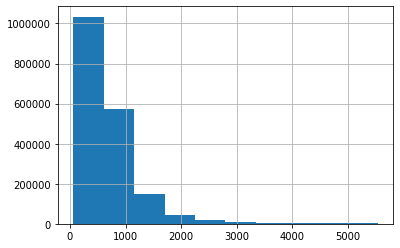

In [17]:
df_clean['duration_sec'].hist()

In [18]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863716,473,2018-12-01 00:11:54.8110,2018-12-01 00:19:48.5470,345.0,Hubbell St at 16th St,37.766474,-122.398295,81.0,Berry St at 4th St,37.775880,-122.393170,3035,Subscriber,No
1863717,841,2018-12-01 00:02:48.7260,2018-12-01 00:16:49.7660,10.0,Washington St at Kearny St,37.795393,-122.404770,58.0,Market St at 10th St,37.776619,-122.417385,2034,Subscriber,No
1863718,260,2018-12-01 00:05:27.6150,2018-12-01 00:09:47.9560,245.0,Downtown Berkeley BART,37.870139,-122.268422,255.0,Virginia St at Shattuck Ave,37.876573,-122.269528,2243,Subscriber,No
1863719,292,2018-12-01 00:03:06.5490,2018-12-01 00:07:59.0800,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,126.0,Esprit Park,37.761634,-122.390648,545,Subscriber,No


In [19]:
df['duration_sec'].describe()

count    1.863721e+06
mean     8.573026e+02
std      2.370379e+03
min      6.100000e+01
25%      3.500000e+02
50%      5.560000e+02
75%      8.720000e+02
max      8.636600e+04
Name: duration_sec, dtype: float64

### _define_

Concert `duration_sec` to `duration_min` and `duration_hour`.

### _code_

In [20]:
df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean['duration_hour'] = df_clean['duration_min']/60

### _test_

In [21]:
df_clean[['duration_sec', 'duration_min', 'duration_hour']].head()

,duration_sec,duration_min,duration_hour
0,453,7.550000,0.125833
1,180,3.000000,0.050000
2,996,16.600000,0.276667
3,825,13.750000,0.229167
4,1316,21.933333,0.365556


### _define_

Convert `id` and `type` to `str`.

### _code_

In [22]:
df_clean.loc[pd.isnull(df_clean['start_station_id']), "start_station_id"] = 0
df_clean.loc[pd.isnull(df_clean['end_station_id']), "end_station_id"] = 0

In [23]:
df_clean['start_station_id'] = df_clean['start_station_id'].astype('int').astype('str')
df_clean['end_station_id'] = df_clean['end_station_id'].astype('int').astype('str')
df_clean['bike_id'] = df_clean['bike_id'].astype('str')
df_clean['user_type'] = df_clean['user_type'].astype('category')

### _test_

In [24]:
df_clean['start_station_id']

0          110
1           81
2          134
3          305
4           98
          ... 
1845077    345
1845078     10
1845079    245
1845080     93
1845081    107
Name: start_station_id, Length: 1845082, dtype: object

In [25]:
type(df_clean['start_station_id'][0])

str

# Feature Engineering

In [26]:
# make colums of hour and weekday
df_clean['start_hour'] = df_clean['start_time'].dt.hour
df_clean['start_month'] = df_clean['start_time'].dt.month
df_clean['end_hour'] = df_clean['end_time'].dt.hour
df_clean['end_month'] = df_clean['end_time'].dt.month
df_clean['start_weekday'] = df_clean['start_time'].dt.weekday
df_clean['end_weekday'] = df_clean['end_time'].dt.weekday

In [27]:
df_clean['return_start_station'] = (df_clean['start_station_id'] == df_clean['end_station_id'])

In [28]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,duration_min,duration_hour,start_hour,start_month,end_hour,end_month,start_weekday,end_weekday,return_start_station
0,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,...,No,7.550000,0.125833,23,1,0,2,2,3,False
1,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,...,No,3.000000,0.050000,23,1,23,1,2,2,False
2,996,2018-01-31 23:34:56.004,2018-01-31 23:51:32.674,134,Valencia St at 24th St,37.752428,-122.420628,4,Cyril Magnin St at Ellis St,37.785881,...,Yes,16.600000,0.276667,23,1,23,1,2,2,False
3,825,2018-01-31 23:34:14.027,2018-01-31 23:47:59.809,305,Ryland Park,37.342725,-121.895617,317,San Salvador St at 9th St,37.333955,...,Yes,13.750000,0.229167,23,1,23,1,2,2,False
4,1316,2018-01-31 23:24:00.416,2018-01-31 23:45:56.824,98,Valencia St at 16th St,37.765052,-122.421866,4,Cyril Magnin St at Ellis St,37.785881,...,No,21.933333,0.365556,23,1,23,1,2,2,False


In [29]:
df_clean.to_csv('df_master.csv', index=False, encoding = 'utf-8')

# Analyze and Visualize

### What is the structure of your dataset?

> Each trip is anonymized and includes:
    - Trip Duration (seconds)
    - Start Time and Date
    - End Time and Date
    - Start Station ID
    - Start Station Name
    - Start Station Latitude
    - Start Station Longitude
    - End Station ID
    - End Station Name
    - End Station Latitude
    - End Station Longitude
    - Bike ID
    - Bike Share for All (https://www.lyft.com/bikes/bay-wheels/bike-share-for-all)
    - User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in how people use the Bay Wheels.
> So the main features are `Trip Duration` and `Start Time and Date`.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> My interested things are broken down following three questions.

> (1)When is people tend to use the Bay Wheels? And how long?
    - Trip Duration
    - Start Time and Date
> (2)Which station is most used? And why?
    - Start Station ID, Latitude, Longitude
    - End Station ID, Latitude, Longitude
> (3)Is there difference in usage between Subscriber and Customer?
    - User Type

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [30]:
color_palette = sb.color_palette()

In [31]:
color_palette[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

Text(0, 0.5, 'count')

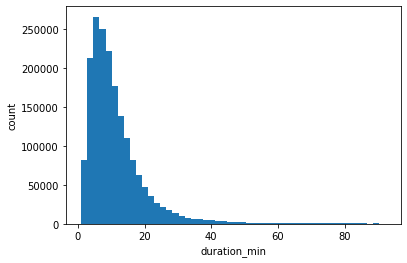

In [32]:
sb.distplot(df_clean['duration_min'], kde=False, rug=False, color=color_palette[0], hist_kws=dict(alpha=1))
plt.ylabel("count")

### →Distribution of duration is very skewed to the right and has one peak. Is there difference between user types, months or week days ?

Text(0, 0.5, 'count')

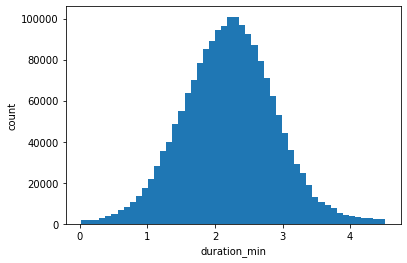

In [33]:
sb.distplot(np.log(df_clean['duration_min']), kde=False, rug=False, color=color_palette[0], hist_kws=dict(alpha=1))
plt.ylabel("count")

### →Distribution of log(duration) is almost standard distribution. Is there difference between user types, months, hours and week days ?

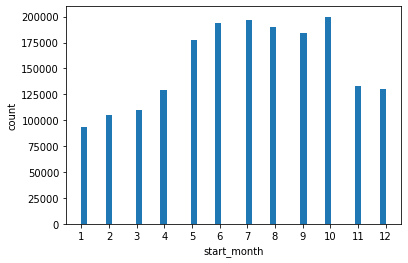

In [34]:
sb.distplot(df_clean['start_month'], kde=False, rug=False, color=color_palette[0], hist_kws=dict(alpha=1))
plt.xticks(np.linspace(1,12,12))
plt.ylabel("count");

### → Distribution of start month has one pekas, in summer season. Is there difference between user types?

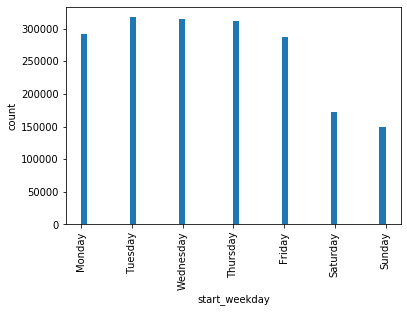

In [35]:
ax = sb.distplot(df_clean['start_weekday'], kde=False, rug=False, color=color_palette[0], hist_kws=dict(alpha=1))
ax.set_xticklabels(['', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation='vertical')
plt.ylabel("count");

### → Distribution of start weekday skewed to the right. Is there difference between user types, months?

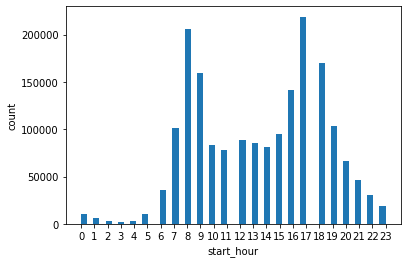

In [36]:
sb.distplot(df_clean['start_hour'], kde=False, rug=False, color=color_palette[0], hist_kws=dict(alpha=1))
plt.xticks(np.linspace(0, 23,24))
plt.ylabel("count");

### → Distribution of start time has two pekas, 8 a.m. and 5 p.m.. Is there difference between user types, months, and week days ?

In [37]:
N = 5
labels_start = []
for i in range(N):
    station_id = df_clean['start_station_id'].value_counts().index[i]
    labels_start.append(df_clean[df_clean['start_station_id'] == station_id]['start_station_name'].values[0])
print(labels_start)

['San Francisco Caltrain Station 2  (Townsend St at 4th St)', 'San Francisco Ferry Building (Harry Bridges Plaza)', 'San Francisco Caltrain (Townsend St at 4th St)', 'Market St at 10th St', 'Berry St at 4th St']


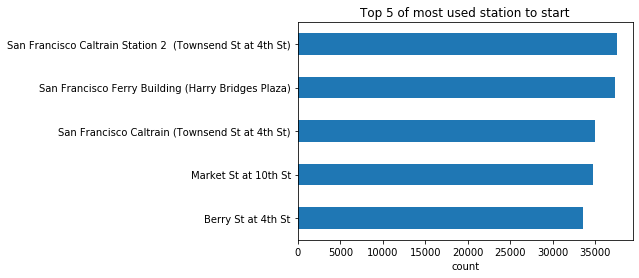

In [38]:
ax = df_clean['start_station_id'].value_counts()[:N].plot.barh()
ax.set_xlabel("count")
ax.set_yticklabels(labels_start)
ax.invert_yaxis()
ax.set_title("Top 5 of most used station to start");

### → Most used station to start is "San Francisco Caltrain Station 2".

In [39]:
labels_end = []
for i in range(N):
    station_id = df_clean[df_clean['start_station_name'] == labels_start[0]]['end_station_id'].value_counts().index[i]
    labels_end.append(df_clean[df_clean['end_station_id'] == station_id]['end_station_name'].values[0])
print(labels_end)

['Townsend St at 7th St', 'Montgomery St BART Station (Market St at 2nd St)', 'Market St at 10th St', 'Howard St at Beale St', 'San Francisco Ferry Building (Harry Bridges Plaza)']


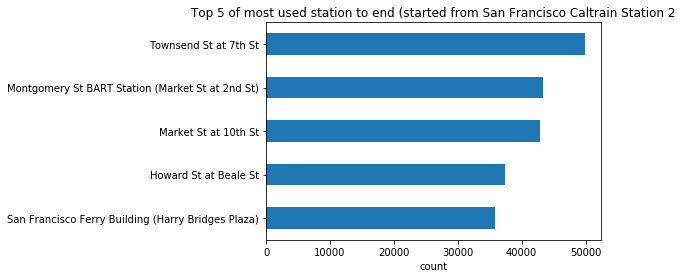

In [40]:
ax = df_clean['end_station_id'].value_counts()[:N].plot.barh()
ax.set_xlabel("count")
ax.set_yticklabels(labels_end)
ax.invert_yaxis()
ax.set_title("Top 5 of most used station to end (started from San Francisco Caltrain Station 2");

### → Users started from "San Francisco Caltrain Station 2" end at "Townsend St at 7th St".

In [41]:
labels_end = []
for i in range(N):
    station_id = df_clean['end_station_id'].value_counts().index[i]
    labels_end.append(df_clean[df_clean['end_station_id'] == station_id]['end_station_name'].values[0])
print(labels_end)

['San Francisco Caltrain Station 2  (Townsend St at 4th St)', 'San Francisco Ferry Building (Harry Bridges Plaza)', 'San Francisco Caltrain (Townsend St at 4th St)', 'The Embarcadero at Sansome St', 'Montgomery St BART Station (Market St at 2nd St)']


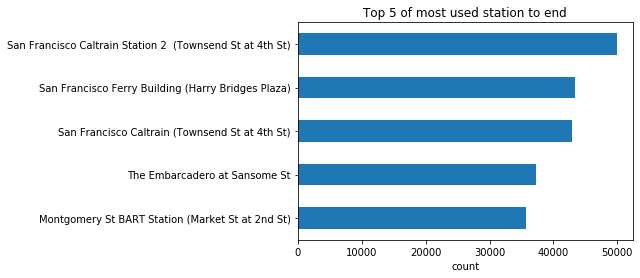

In [42]:
ax = df_clean['end_station_id'].value_counts()[:N].plot.barh()
ax.set_xlabel("count")
ax.set_yticklabels(labels_end)
ax.invert_yaxis()
ax.set_title("Top 5 of most used station to end");

### → Most used station to end is "San Francisco Caltrain Station 2". It is same with most used station to start.

In [43]:
labels_start = []
for i in range(N):
    station_id = df_clean[df_clean['end_station_name'] == labels_end[0]]['start_station_id'].value_counts().index[i]
    labels_start.append(df_clean[df_clean['start_station_id'] == station_id]['start_station_name'].values[0])
print(labels_start)

['Townsend St at 7th St', 'Market St at 10th St', 'Division St at Potrero Ave', '8th St at Ringold St', '11th St at Natoma St']


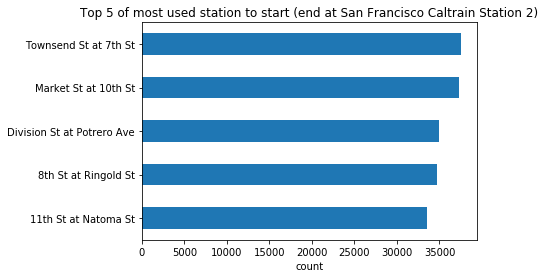

In [44]:
ax = df_clean['start_station_id'].value_counts()[:N].plot.barh()
ax.set_xlabel("count")
ax.set_yticklabels(labels_start)
ax.invert_yaxis()
ax.set_title("Top 5 of most used station to start (end at San Francisco Caltrain Station 2)");

### → Users ended at "San Francisco Caltrain Station 2" had started from "Townsend St at 7th St".

### → Most used station to start and end is "San Francisco Caltrain Station 2". 
###      And most used root is "San Francisco Caltrain Station 2" ↔︎ "Townsend St at 7th St".

In [45]:
df_clean[(df_clean['start_station_id'] == "67") & (df_clean['end_station_id'] == "90")].head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,duration_min,duration_hour,start_hour,start_month,end_hour,end_month,start_weekday,end_weekday,return_start_station
557,234,2018-01-31 19:24:26.083,2018-01-31 19:28:20.876,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,90,Townsend St at 7th St,37.771058,...,No,3.9,0.065,19,1,19,1,2,2,False


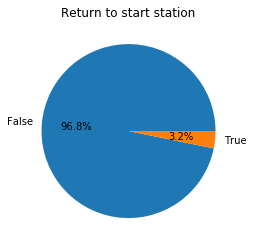

In [46]:
plt.pie(df_clean['return_start_station'].value_counts(), labels=df_clean['return_start_station'].unique(), autopct="%1.1f%%")
plt.title("Return to start station");

### → Over 95% user didn't return bike to the start station. Is there difference between user types?

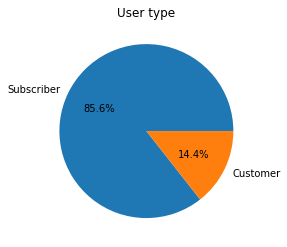

In [47]:
plt.pie(df_clean['user_type'].value_counts(), labels=df_clean['user_type'].unique(), autopct="%1.1f%%")
plt.title("User type");

### → 85% of users are subscribers.

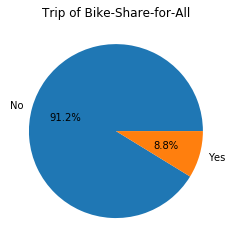

In [48]:
plt.pie(df_clean['bike_share_for_all_trip'].value_counts(), labels=df_clean['bike_share_for_all_trip'].unique(), autopct="%1.1f%%")
plt.title("Trip of Bike-Share-for-All");

### → Users of Bike-Share-for-All is almost 10 %.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Duration of trip has skewed distribution. Users tend to ride the bike for short use.
> Riding the bike increases in summer season. I guess comfortable temperature makes the usage increase.
> Sturday and Sunday's usage  decrease. 
> The usage reaches a peak at around 8 a.m and 5 p.m. I guess commuting to work’s effects.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> ....

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

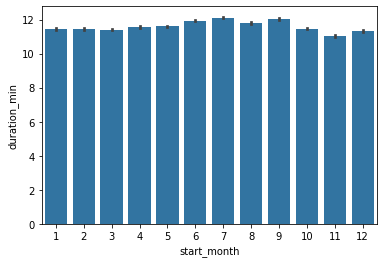

In [49]:
sb.barplot(data=df_clean, y='duration_min', x='start_month', color=color_palette[0])

### → There is no difference of trip duration between months.

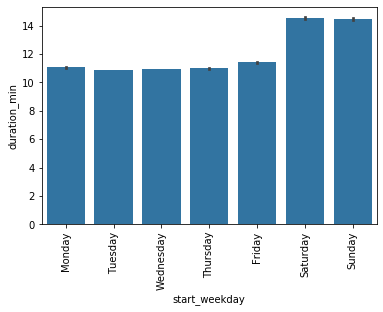

In [50]:
ax = sb.barplot(data=df_clean, y='duration_min', x='start_weekday', color=color_palette[0])
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation='vertical');

### → Users take long trip on Saturday and Sunday.

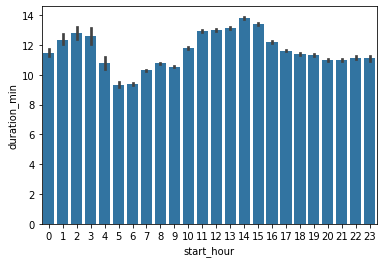

In [51]:
sb.barplot(data=df_clean, y='duration_min', x='start_hour', color=color_palette[0])

### → There are two peaks at 1 a.m and 2 p.m.

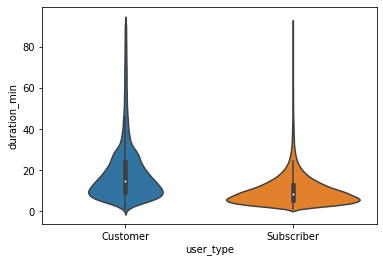

In [52]:
sb.violinplot(data=df_clean, y='duration_min', x='user_type')

### → Subscribers use more short time.

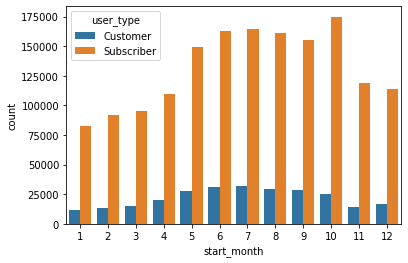

In [53]:
sb.countplot(data=df_clean, x='start_month', hue='user_type')

### → Trend of count of use is not difference between Customer and Subscriber.

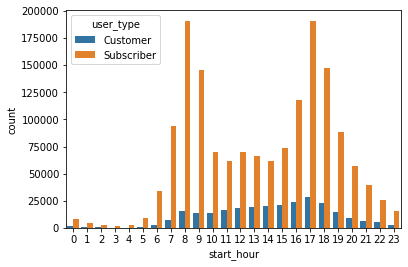

In [54]:
sb.countplot(data=df_clean, x='start_hour', hue='user_type');

### → Customer has one peak at 5 p.m. On the other hand, Subscriber has 2 peaks at 8 a.m and 5 p.m.

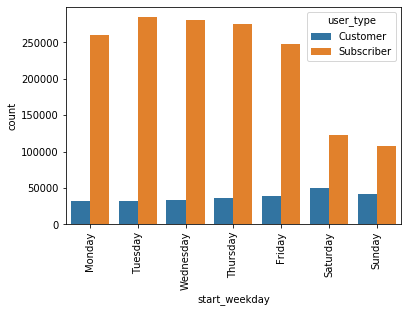

In [55]:
ax = sb.countplot(data=df_clean, x='start_weekday', hue='user_type')
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation='vertical');→ 

### → Customer's use inscreases at weekend. But Subscriber's use decrease at weekend.

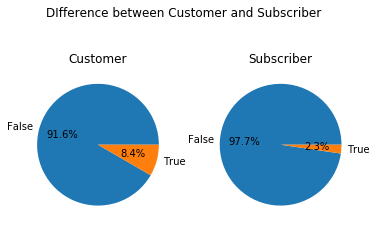

In [56]:
plt.figure()

plt.subplot(1,2,1)
plt.pie(df_clean[df_clean['user_type'] == "Customer"]['return_start_station'].value_counts(), labels=df_clean['return_start_station'].unique(), autopct="%1.1f%%");
plt.title("Customer")

plt.subplot(1,2,2)
plt.pie(df_clean[df_clean['user_type'] == "Subscriber"]['return_start_station'].value_counts(), labels=df_clean['return_start_station'].unique(), autopct="%1.1f%%");
plt.title("Subscriber")

plt.suptitle("DIfference between Customer and Subscriber");

### → Customers tend to return the bike to the start station more than Subscribers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is no difference of trip duration between months but there is difference between weekdays. Users take long trip on Saturday and Sunday.
> Therefore, subscribers use more short time. And customers have one peak at 5 p.m to use. On the other hand, Subscribers have 2 peaks at 8 a.m and 5 p.m to use. Subscribers uses the bike to commute?
> Customer's use inscreases at weekend. But Subscriber's use decrease at weekend.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There are two peaks in trip duration. At 1 a.m and 2 p.m, Users tend to start riding the bike.
> Customers tend to return the bike to the start station more than Subscribers.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### About San Francisco
San Francisco, CA, USA Lat Long Coordinates Info
The latitude of San Francisco, CA, USA is 37.773972, and the longitude is -122.431297. San Francisco, CA, USA is located at United States country in the Cities place category with the gps coordinates of 37° 46' 26.2992'' N and 122° 25' 52.6692'' W.

[https://www.google.co.jp/maps/place/37%C2%B046'30.0%22N+122%C2%B024'00.0%22W/@37.7740926,-122.3996889,16z/data=!4m5!3m4!1s0x0:0x0!8m2!3d37.775!4d-122.4]

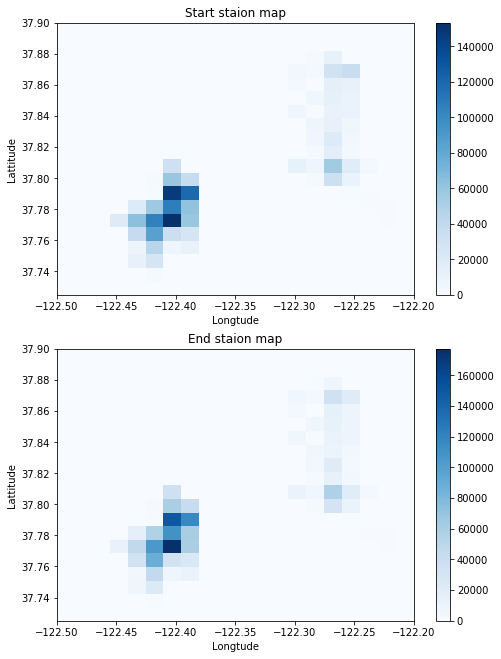

In [57]:
plt.figure(figsize=(8, 11))
plt.subplot(2,1,1)
h = plt.hist2d(data=df_clean, y='start_station_latitude', x='start_station_longitude',
           bins=[np.linspace(-122.5,-122.2,21), np.linspace(37.725,37.9,21)], cmap="Blues");
plt.colorbar(h[3])
plt.xlabel("Longtude")
plt.ylabel("Lattitude")
plt.title("Start staion map")

plt.subplot(2,1,2)
h = plt.hist2d(data=df_clean, y='end_station_latitude', x='end_station_longitude',
           bins=[np.linspace(-122.5,-122.2,21), np.linspace(37.725,37.9,21)], cmap="Blues");
plt.colorbar(h[3])
plt.xlabel("Longtude")
plt.ylabel("Lattitude")
plt.title("End staion map");

### → Data includes users in Oakland?

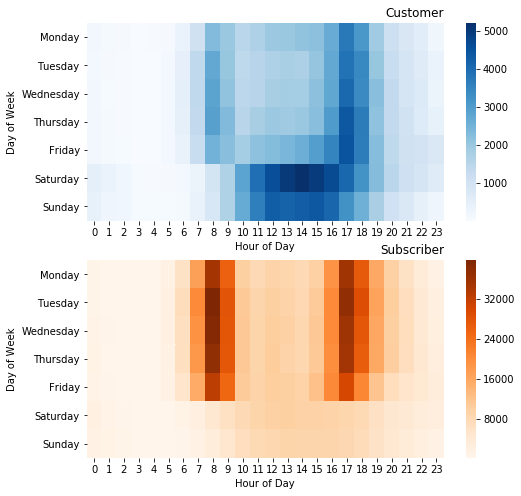

In [58]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
customers = df_clean.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_weekday', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_weekday', columns='start_hour', values='count')
ax = sb.heatmap(ct_counts, cmap="Blues");
ax.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation='horizontal')
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = df_clean.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_weekday', 'start_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_weekday', columns='start_hour', values='count')
ax = sb.heatmap(st_counts, cmap="Oranges");
ax.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation='horizontal')
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

### → Customers uses the bike at weekend. On the other hand, Subscribers uses the bike on weekdays at 8 a.m and 5 p.m. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Customers uses the bike at weekend. On the other hand, Subscribers uses the bike on weekdays at 8 a.m and 5 p.m. 

### Were there any interesting or surprising interactions between features?

> ...